|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [1]:
# write your code here ^_^
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Q2: Read instagram_users.csv file

In [6]:
# write your code here ^_^
df = pd.read_csv('instagram_users.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64244 entries, 0 to 64243
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0    Num_posts               64244 non-null  int64  
 1   Num_following            64244 non-null  int64  
 2   Num_followers            64244 non-null  int64  
 3   Biography_length         64244 non-null  int64  
 4   Picture_availability     64244 non-null  int64  
 5   Link_availability        64244 non-null  int64  
 6   Average_caption_length   64244 non-null  int64  
 7   Caption_zero             64244 non-null  float64
 8   Non_image_percentage     64244 non-null  float64
 9   Engagement_rate_like     64244 non-null  float64
 10  Engagement_rate_comment  64244 non-null  float64
 11  Location_tag_percentage  64244 non-null  float64
 12  Average_hashtag_count    64244 non-null  float64
 13  Promotional_keywords     64244 non-null  float64
 14  Followers_keywords    

# Q3: Split tha dataset into training and testing

In [9]:
# write your code here ^_^
from sklearn.model_selection import train_test_split
X = df.drop('real_fake',axis=1)
y = df['real_fake']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [10]:
# write your code here ^_^
from sklearn.tree import DecisionTreeClassifier
# My First Model Will Be The Decision Tree Model
dtree = DecisionTreeClassifier()

In [11]:
# Next We Have To Train The Model To Get a Great Result And Accurecy
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
# Evaluate The Model
predictions1 = dtree.predict(X_test)


In [13]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [21]:
# The Report That Shows How Many Times of Occurrence of Each Class in y_test
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

        fake       0.85      0.86      0.85      9605
        real       0.86      0.85      0.85      9669

    accuracy                           0.85     19274
   macro avg       0.85      0.85      0.85     19274
weighted avg       0.85      0.85      0.85     19274



In [15]:
# The Confusion Matrix
print(confusion_matrix(y_test,predictions))

[[8230 1375]
 [1473 8196]]


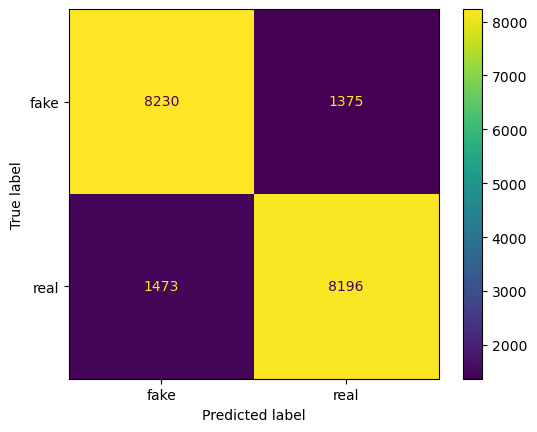

In [16]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtree, X_test, y_test)  
plt.show()

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [17]:
# write your code here ^_^
#The Second Model is Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100) 
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
#Report for The Accurecy
predictions2 = rfc.predict(X_test)
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

        fake       0.95      0.84      0.89      9605
        real       0.86      0.96      0.90      9669

    accuracy                           0.90     19274
   macro avg       0.90      0.90      0.90     19274
weighted avg       0.90      0.90      0.90     19274



In [23]:
# The Confusion Matrix
print(confusion_matrix(y_test,predictions2))


[[8089 1516]
 [ 432 9237]]


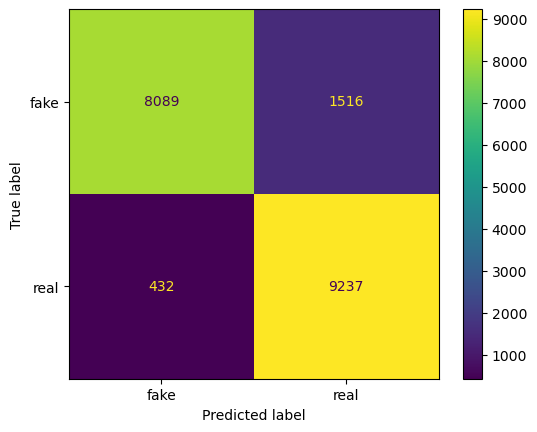

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc, X_test, y_test)  
plt.show()

## Q4.3: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [25]:
# write your code here ^_^
# The Third Model is The Linear Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [48]:
# Prepare the Data for The Linear Regression Model 
real_fake = {'real': 1,'fake': 2}
y_train= [real_fake[item] for item in y_train]



[1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,


In [54]:
real_fake = {'real': 1,'fake': 2}
y_test= [real_fake[item] for item in y_test]


In [49]:
# Train The Model
lm.fit(X_train,y_train)


LinearRegression()

In [50]:
# Evaluating The Model
print(lm.intercept_)

1.5360725226611673


In [51]:
# Taking a Look on The 'Coefficient'
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Num_posts,7.125359e-06
Num_following,-1.267516e-07
Num_followers,6.496816e-05
Biography_length,-7.373560e-04
Picture_availability,-4.901744e-02
Link_availability,-3.209281e-01
Average_caption_length,1.756714e-04
Caption_zero,3.938193e-02
Non_image_percentage,-3.952488e-02
Engagement_rate_like,2.118798e-05


In [52]:
predictions = lm.predict(X_test)
predictions

array([1.68799511, 1.3277475 , 1.65185069, ..., 1.03041406, 1.56506256,
       1.28785019])

In [55]:
Real_Values = np.array(y_test)
Real_Values

array([2, 1, 2, ..., 1, 2, 1])

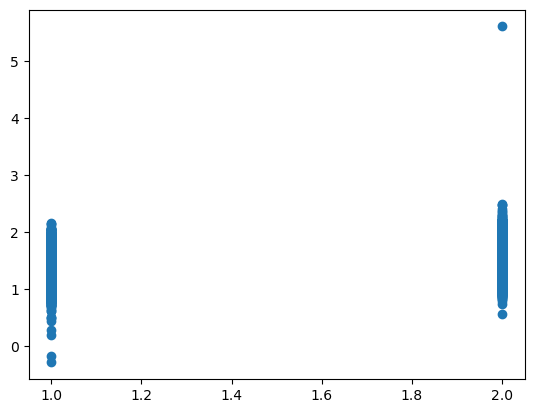

In [56]:
plt.scatter(Real_Values,predictions);

In [57]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lm, X_test, y_test)  
plt.show()

ValueError: plot_confusion_matrix only supports classifiers